# Основы программирования в Python

*Алла Тамбовцева, НИУ ВШЭ*

## Практикум 5: методы на строках, работа с текстом

### Задача 1

Напишите программу, которая запрашивает у пользователя с клавиатуры некоторый текст, и выводит на экран этот текст, только заглавными буквами и с восклицательным знаком на конце.

**Пример работы программы**

Ввод:

    exam is coming

Вывод:

    EXAM IS COMING!

In [1]:
phrase = input()
print(phrase.upper() + "!") 

friday
FRIDAY!


### Задача 2

Напишите программу, которая принимает на вход список слов `words` и создаёт на его основе новый список `words_clean`, в котором все слова написаны в нижнем регистре. 

In [2]:
words = ["Speak ", "to", "me ", "of", "Florence ",
         "And ", "of", "the", "Renaissance"]

In [3]:
words_clean = []
for word in words:
    words_clean.append(word.lower())
print(words_clean)

['speak ', 'to', 'me ', 'of', 'florence ', 'and ', 'of', 'the', 'renaissance']


In [4]:
# то же, но со списковым включением

words_clean = [word.lower() for word in words] 
print(words_clean)

['speak ', 'to', 'me ', 'of', 'florence ', 'and ', 'of', 'the', 'renaissance']


### Задача 3

Напишите программу, которая приводит текст, сохранённый в переменной `text`, к нормальному виду. Нормальный вид текста: текст состоит только из слов в начальной форме, записанных маленькими буквами через пробел, нет никаких посторонних символов. 

Алгоритм работы: 

1. Привести все буквы к нижнему регистру.
2. Заменить все знаки препинания на пробелы. 
3. Разбить текст на слова и получить список слов.
4. Избавиться от лишних пробелов в словах внутри полученного списка.
5. Привести каждое слово в списке к начальной форме.
6. Склеить все слова в начальной форме в одну строку с текстом.

**Полезный код 1.** Знаки препинания можно извлечь из строки `punctuation`, которая хранится в модуле `string`. Однако там не все знаки препинания, например, нет русских кавычек-ёлочек и длинного тире. Их можно добавить самостоятельно!

In [5]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


**Полезный код 2.** Привести слова к начальной форме без специальных библиотек не получится. Можно установить библиотеку `pymorphy2`, в неё встроен морфологический анализатор – программа, которая позволяет выполнять морфологический разбор слова.

Установка библиотеки:

In [7]:
!pip install pymorphy2

In [6]:
from pymorphy2 import MorphAnalyzer

# создаем анализатор
morph = MorphAnalyzer()

# делаем разбор и забираем начальную форму
print(morph.parse('политологами')[0].normal_form)

политолог


In [7]:
# почему извлекаем элемент с индексом 0?
# всегда возвращается список всех возможных разборов,
# а мы забираем самый вероятный

# многозначный пример

# NOUN,inan,neut sing,nomn: существительное, неодушевленное, 
# средний род, единственное число, именительный падеж (номинатив)

# NOUN,inan,neut sing,accs: существительное, неодушевленное, 
# средний род, единственное число, винительный падеж (аккузатив)

# VERB,perf,intr neut,sing,past,indc: глагол прошедшего времени, 
# непереходный, средний род, единственное число, 
# изъявительное наклонение (индикатив)

morph.parse('стекло')

[Parse(word='стекло', tag=OpencorporaTag('NOUN,inan,neut sing,nomn'), normal_form='стекло', score=0.690476, methods_stack=((DictionaryAnalyzer(), 'стекло', 157, 0),)),
 Parse(word='стекло', tag=OpencorporaTag('NOUN,inan,neut sing,accs'), normal_form='стекло', score=0.285714, methods_stack=((DictionaryAnalyzer(), 'стекло', 157, 3),)),
 Parse(word='стекло', tag=OpencorporaTag('VERB,perf,intr neut,sing,past,indc'), normal_form='стечь', score=0.023809, methods_stack=((DictionaryAnalyzer(), 'стекло', 1015, 3),))]

In [8]:
# из Википедии

text = """
Платон был новатором письменного диалога и диалектических 
форм в философии. К тому же он считается основателем 
западной политической философии. Его самый известный вклад – 
теория идей, познаваемых умозрением, в которой Платон представляет 
проблемы универсалий, известное как платонизм (также неоднозначно 
называемый либо платоновским реализмом, либо платоновским идеализмом). 
Он также является эпонимом платонической любви и платоновых тел.
"""

In [9]:
# обновляем набор символов – добавляем длинное тире

punctuation = punctuation + "–"
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~–


In [10]:
text = text.lower()

# заменяем каждый символ из punctuation на пробел
for p in punctuation:
    text = text.replace(p, " ")

# разбиваем на слова    
words = text.split() 

# забираем начальную форму для каждого слова
lemmas = []
for word in words:
    r = morph.parse(word)[0].normal_form
    lemmas.append(r)

# склеиваем начальные формы в одну строку    
final = " ".join(lemmas)
print(final)

платон быть новатор письменный диалог и диалектический форма в философия к тот же он считаться основатель западный политический философия он самый известный вклад теория идея познавать умозрение в который платон представлять проблема универсалия известный как платонизм также неоднозначно называть либо платоновский реализм либо платоновский идеализм он также являться эпоним платонический любовь и платонов тело


**Бонус.** Построим облако слов для этого текста. Установим библиотеку `wordcloud`:

In [ ]:
!pip install wordcloud

Импортируем оттуда функцию `WordCloud()`:

In [11]:
from wordcloud import WordCloud

Импортируем модуль для отрисовки графиков (уже установлен вместе с Anaconda):

In [12]:
from matplotlib import pyplot as plt

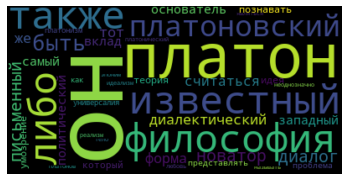

In [13]:
wordcloud = WordCloud().generate(final)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Чтобы убрать стоп-слова (частые слова вроде предлогов, союзов и местоимений, которые не несут большой смысловой нагрузки), загрузим их из текстового файла со словами на Github:

In [14]:
import requests

# отправляем запрос по ссылке
url = "https://raw.githubusercontent.com/stopwords-iso/stopwords-ru/master/stopwords-ru.txt"
response = requests.get(url)

# забираем текст с веб-страницы
stop_text = response.text

In [15]:
stop_text

'c\nа\nалло\nбез\nбелый\nблизко\nболее\nбольше\nбольшой\nбудем\nбудет\nбудете\nбудешь\nбудто\nбуду\nбудут\nбудь\nбы\nбывает\nбывь\nбыл\nбыла\nбыли\nбыло\nбыть\nв\nважная\nважное\nважные\nважный\nвам\nвами\nвас\nваш\nваша\nваше\nваши\nвверх\nвдали\nвдруг\nведь\nвезде\nвернуться\nвесь\nвечер\nвзгляд\nвзять\nвид\nвидел\nвидеть\nвместе\nвне\nвниз\nвнизу\nво\nвода\nвойна\nвокруг\nвон\nвообще\nвопрос\nвосемнадцатый\nвосемнадцать\nвосемь\nвосьмой\nвот\nвпрочем\nвремени\nвремя\nвсе\nвсе еще\nвсегда\nвсего\nвсем\nвсеми\nвсему\nвсех\nвсею\nвсю\nвсюду\nвся\nвсё\nвторой\nвы\nвыйти\nг\nгде\nглавный\nглаз\nговорил\nговорит\nговорить\nгод\nгода\nгоду\nголова\nголос\nгород\nда\nдавать\nдавно\nдаже\nдалекий\nдалеко\nдальше\nдаром\nдать\nдва\nдвадцатый\nдвадцать\nдве\nдвенадцатый\nдвенадцать\nдверь\nдвух\nдевятнадцатый\nдевятнадцать\nдевятый\nдевять\nдействительно\nдел\nделал\nделать\nделаю\nдело\nдень\nденьги\nдесятый\nдесять\nдля\nдо\nдовольно\nдолго\nдолжен\nдолжно\nдолжный\nдом\nдорога\nдруг\nдругая

Разбиваем `stop_text` на слова по `\n`:

In [16]:
stop_words = stop_text.split("\n")
stop_words[0:10] # первые 10 слов

['c',
 'а',
 'алло',
 'без',
 'белый',
 'близко',
 'более',
 'больше',
 'большой',
 'будем']

Осталось учесть этот список при генерации облака слов – аргумент `stopwords`:

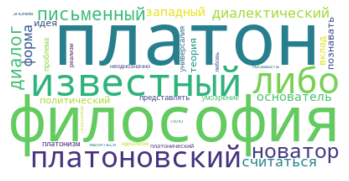

In [17]:
# заодно сделаем цвет фона белым

wordcloud = WordCloud(stopwords = stop_words, 
                     background_color="white").generate(final)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Добавим маску, чтобы сделать облако слов более похожим на Платона.
Импортируем функцию `Image()` для обработки изображений и библиотеку `numpy` для превращения изображения в числовой массив:

In [18]:
from PIL import Image
import numpy as np

Создаём массив на основе изображения `Platon.jpeg` ([ссылка](https://www.dropbox.com/s/c7c2k8npc99efnl/Platon.jpeg?dl=0) на картинку, просто обвела по фото скульптуры):

In [19]:
my_mask = np.array(Image.open("Platon.jpeg"))

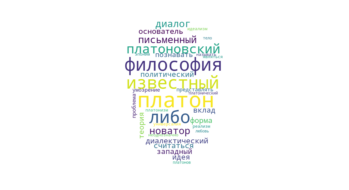

In [20]:
# добавляем аргумент mask

wordcloud = WordCloud(stopwords = stop_words, 
                     background_color="white",
                     mask = my_mask).generate(final)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Узнать нельзя, но можно что-то более классное отрисовать, например, стену в пещере с тенями. Я пробовала, но тут нужны силуэты с небольшим числом деталей, плюс, более длинный текст с большим числом слов в облаке. 